In [1]:
import chess
import chess.svg, chess.pgn
import random
import time
from IPython.display import clear_output, SVG, display_svg, display_html
import collections
import math
import cProfile

In [2]:
board = chess.Board()
board.reset()

In [3]:

def makeRandomMove(board):
    index = random.randint(0, len(list(board.legal_moves)) - 1)
    move_uci = list(board.legal_moves)[index]
    #print(move_uci)
    board.push(move_uci)
    return


In [4]:
def makeRandomCapture(board):
    moves = list(board.legal_moves)
    captures = [move for move in moves if board.is_capture(move)]
    if(captures == []):
        index = random.randint(0, len(moves) - 1)
        board.push(moves[index])

    else:
        index = random.randint(0, len(captures) - 1)
        board.push(captures[index])

    return

In [5]:
def board_to_game(board):
    game = chess.pgn.Game()

    # Undo all moves.
    switchyard = collections.deque()
    while board.move_stack:
        switchyard.append(board.pop())

    game.setup(board)
    node = game

    # Replay all moves.
    while switchyard:
        move = switchyard.pop()
        node = node.add_variation(move)
        board.push(move)

    game.headers["Result"] = board.result()
    return game

    #https://github.com/niklasf/python-chess/issues/63

In [6]:
# Returns an int - positive means white better, negative means black better, 0 is equal
# Simply adds up the piece values from FEN

piece_values = {
    "p" : -1,
    "P" : 1,
    "r" : -5,
    "R" : 5,
    "n" : -3,
    "N" : 3,
    "b" : -3,
    "B" : 3,
    "q" : -9,
    "Q" : 9
}

def evaluate_position(board):

    if(board.outcome() == None):
        fen_string = board.board_fen()
        eval = 0

        for char in fen_string:
            eval += piece_values[char] if char in piece_values else 0

        return eval
    
    else:
        result = board.outcome().result()

        if(result == "1-0"):
            #print("Win for white")
            return 300
            
        elif(result == "0-1"):
            return -300

        else:
            return 0

    
        

In [7]:
evaluate_position(board)

0

In [8]:
# Level 1 AI - makes random moves

def random_AI_game(board, display=False):
    while(True):
        makeRandomMove(board)

        if not (board.outcome() == None):
            print("Game Over")
            break

        if(display):    
            display_svg(chess.svg.board(board, size=700))
            clear_output(wait=True)
        

        time.sleep(0.01)

    print(board_to_game(board))

    return

random_AI_game(board)

Game Over
[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "1/2-1/2"]

1. a3 b5 2. Nf3 f6 3. g4 Bb7 4. Bg2 Bc6 5. Ne5 h5 6. e4 f5 7. Bf1 Na6 8. Be2 Nb8 9. Nf7 Rh7 10. Nxd8 Bb7 11. b4 g5 12. c4 Bh6 13. Rg1 Ba6 14. Qa4 bxc4 15. f3 Rf7 16. Kd1 e6 17. f4 fxg4 18. Nxe6 Bb5 19. Nc3 c6 20. e5 c5 21. Bxc4 Na6 22. Nf8 Rg7 23. h4 gxh4 24. e6 Nf6 25. Nxd7 Rc8 26. Qc2 Re7 27. Qh7 Kd8 28. Ne2 Bc6 29. Ne5 Bg5 30. Rg2 Rg7 31. Bb3 Rg8 32. Rg3 Rf8 33. Nf3 Bb7 34. Rb1 Ke8 35. Rxg4 Be4 36. Qd7+ Nxd7 37. Nfg1 Ke7 38. Rg3 Bh7 39. Nh3 Rcd8 40. d3 cxb4 41. Ra1 Ke8 42. Be3 Rf7 43. Ra2 Nf6 44. Bc1 Rxd3+ 45. Kc2 Rd1+ 46. f5 Bxf5+ 47. Kxd1 hxg3 48. Bd5 Bh6 49. Bc6+ Rd7+ 50. Nd4 Bb1 51. Bb7 Bd2 52. Nc2 Nc7 53. axb4 Bf4+ 54. Nd4 Bf5 55. Bb2 Ncd5 56. Ra4 Rf7 57. Bc3 Rg7 58. Ra1 Rg5 59. Nxf5 Ng4 60. Nf2 Bb8 61. Nd6+ Ke7 62. Kc2 Nc7 63. Nh1 Nh6 64. Bf6+ Kxe6 65. Kc3 Nf5 66. b5 Nxb5+ 67. Kc4 Rg7 68. Nxb5 Rg5 69. Ra3 Bd6 70. Bf3 Kd7 71. Rc3 Rg4+ 72. Kb3 Bf8 73. Bg7 Be7 74. Bf6 Rf4 

In [9]:
# Level 2 AI - prioritises captures

def capture_AI_game(board, display=False):
    while(True):

        # Choose captures
        makeRandomCapture(board)

        if not (board.outcome() == None):
            print("Game Over")
            break

        if(display):    
            display_svg(chess.svg.board(board, size=700))
            clear_output(wait=True)
        

        #time.sleep(0.01)

    print(board_to_game(board))

    return

In [10]:
capture_AI_game(board, True)

Game Over
[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "1/2-1/2"]

1. a3 b5 2. Nf3 f6 3. g4 Bb7 4. Bg2 Bc6 5. Ne5 h5 6. e4 f5 7. Bf1 Na6 8. Be2 Nb8 9. Nf7 Rh7 10. Nxd8 Bb7 11. b4 g5 12. c4 Bh6 13. Rg1 Ba6 14. Qa4 bxc4 15. f3 Rf7 16. Kd1 e6 17. f4 fxg4 18. Nxe6 Bb5 19. Nc3 c6 20. e5 c5 21. Bxc4 Na6 22. Nf8 Rg7 23. h4 gxh4 24. e6 Nf6 25. Nxd7 Rc8 26. Qc2 Re7 27. Qh7 Kd8 28. Ne2 Bc6 29. Ne5 Bg5 30. Rg2 Rg7 31. Bb3 Rg8 32. Rg3 Rf8 33. Nf3 Bb7 34. Rb1 Ke8 35. Rxg4 Be4 36. Qd7+ Nxd7 37. Nfg1 Ke7 38. Rg3 Bh7 39. Nh3 Rcd8 40. d3 cxb4 41. Ra1 Ke8 42. Be3 Rf7 43. Ra2 Nf6 44. Bc1 Rxd3+ 45. Kc2 Rd1+ 46. f5 Bxf5+ 47. Kxd1 hxg3 48. Bd5 Bh6 49. Bc6+ Rd7+ 50. Nd4 Bb1 51. Bb7 Bd2 52. Nc2 Nc7 53. axb4 Bf4+ 54. Nd4 Bf5 55. Bb2 Ncd5 56. Ra4 Rf7 57. Bc3 Rg7 58. Ra1 Rg5 59. Nxf5 Ng4 60. Nf2 Bb8 61. Nd6+ Ke7 62. Kc2 Nc7 63. Nh1 Nh6 64. Bf6+ Kxe6 65. Kc3 Nf5 66. b5 Nxb5+ 67. Kc4 Rg7 68. Nxb5 Rg5 69. Ra3 Bd6 70. Bf3 Kd7 71. Rc3 Rg4+ 72. Kb3 Bf8 73. Bg7 Be7 74. Bf6 Rf4 

In [11]:
# Performs a minimax search and returns best move, along with the evaluation

def minimax_search(board, depth, white_to_move):

    if(depth == 0 or board.is_game_over()):
        eval = evaluate_position(board)
        return (None,eval)

    else:
        moves_list = list(board.legal_moves)
        random.shuffle(moves_list)

        best_eval = -math.inf if white_to_move else math.inf
        best_move = ''
        
        for move in moves_list:
            # Evaluate each move and recursively find the best one

            board.push(move)
            current_eval = minimax_search(board, depth - 1, not white_to_move)[1]

            if(white_to_move):
                if(current_eval >= best_eval):
                    best_eval = current_eval
                    best_move = move


            else:
                if(current_eval <= best_eval):
                    best_eval = current_eval
                    best_move = move

            board.pop()

        return (best_move, best_eval)

In [12]:
# Level 3 AI - minimax bots playing against each other

def minimax_game(board, depth, display=False):

    board.reset()

    white_to_move = True
    
    while(True):

        search = minimax_search(board, depth, white_to_move)
        #print(search)
        board.push(search[0])
        white_to_move = not white_to_move

        if not (board.outcome() == None):
            print("Game Over")
            break

        if(display):    
            display_svg(chess.svg.board(board, size=700))
            clear_output(wait=True)
        

        #time.sleep(0.01)

    print(board_to_game(board))

    return

In [13]:
minimax_game(board, 3, True)

KeyboardInterrupt: 

In [ ]:
def move_ordering_sort(board, only_captures = False):

    moves_list = list(board.legal_moves)

    captures = []
    #checks = []
    temp_list = []

    for move in moves_list:
        if(board.is_capture(move)):
            captures.append(move)

        # elif(board.gives_check(move)):
        #     checks.append(move)

        else:
            temp_list.append(move)

    if(only_captures):
        return captures

    else:
        return captures + temp_list



In [ ]:
total_branches_pruned = 0
total_quiescence_positions_evaluated = 0
total_quiescence_calls = 0

def quiescence_search(board, white_to_move, alpha, beta, depth):

    global total_quiescence_calls
    total_quiescence_calls += 1

    # Very similar to alpha beta - but we only look at captures and checkmates - to solve the horizon issue without huge branching

    moves_list = move_ordering_sort(board, only_captures=True)

    #static_eval = evaluate_position(board)

    # if(white_to_move and beta <= static_eval):
    #     return (None, static_eval)

    # elif((not white_to_move) and alpha >= static_eval):
    #     return (None, static_eval)

    #print(moves_list)

    #moves_list = list(board.legal_moves)

    if(board.is_game_over() or moves_list == [] or depth == 0):
        eval = evaluate_position(board)
        global total_quiescence_positions_evaluated
        total_quiescence_positions_evaluated += 1
        return (None,eval)

    else:
        #random.shuffle(moves_list)
        best_eval = -math.inf if white_to_move else math.inf
        best_move = ''
        global total_branches_pruned

        if(white_to_move):               
            for move in moves_list:
                # Evaluate each move and recursively find the best one

                board.push(move)
                current_eval = quiescence_search(board, False, alpha, beta, depth - 1)[1]  
                if(current_eval > best_eval):
                    best_eval = current_eval
                    best_move = move

                board.pop()

                alpha = max(alpha, current_eval)

                #if(alpha > 100): print(depth, move, alpha, beta)

                if(alpha >= beta):

                    total_branches_pruned += 1
                    break


        else:
            for move in moves_list:
                # Evaluate each move and recursively find the best one

                board.push(move)
                current_eval = quiescence_search(board, True, alpha, beta, depth - 1)[1]  
                if(current_eval < best_eval):
                    best_eval = current_eval
                    best_move = move

                board.pop()

                beta = min(beta, current_eval)

                if(alpha >= beta):

                    total_branches_pruned += 1
                    break

        #print(depth, "Best move is: " + str(best_move), "Eval: " + str(best_eval), end=" ")
        return (best_move, best_eval)

In [ ]:
# Performs a minimax search with alpha/beta pruning and returns best move, along with the evaluation
total_alphabeta_nodes_searched = 0
total_alphabeta_calls = 0

def alphabeta_search(board, depth, white_to_move, alpha, beta):

    #moves_list = list(board.legal_moves)
    global total_alphabeta_calls
    total_alphabeta_calls += 1

    if(depth == 0 or board.is_game_over()):
        global total_alphabeta_nodes_searched
        total_alphabeta_nodes_searched += 1
        eval = quiescence_search(board, white_to_move, alpha, beta, 99)[1]
        #eval = evaluate_position(board)
        return (None,eval)

    else:      
        moves_list = move_ordering_sort(board, only_captures=False)
        random.shuffle(moves_list)
        
        best_eval = -math.inf if white_to_move else math.inf
        best_move = ''
        global total_branches_pruned

        if(white_to_move):               
            for move in moves_list:
                # Evaluate each move and recursively find the best one

                board.push(move)
                current_eval = alphabeta_search(board, depth - 1, False, alpha, beta)[1]  
                if(current_eval > best_eval):
                    best_eval = current_eval
                    best_move = move

                board.pop()

                alpha = max(alpha, current_eval)

                #if(alpha > 100): print(depth, move, alpha, beta)

                if(alpha >= beta):

                    total_branches_pruned += 1
                    break


        else:
            for move in moves_list:
                # Evaluate each move and recursively find the best one

                board.push(move)
                current_eval = alphabeta_search(board, depth - 1, True, alpha, beta)[1]  
                if(current_eval < best_eval):
                    best_eval = current_eval
                    best_move = move

                board.pop()

                beta = min(beta, current_eval)

                if(alpha >= beta): 

                    total_branches_pruned += 1
                    break

        #print(depth, "Best move is: " + str(best_move), "Eval: " + str(best_eval), end=" ")
        return (best_move, best_eval)

In [ ]:
def reset_stat_variables():
    global total_quiescence_positions_evaluated

    global total_quiescence_calls

    global total_alphabeta_nodes_searched

    global total_alphabeta_calls

    global total_branches_pruned


    total_quiescence_positions_evaluated = 0
    total_quiescence_calls = 0
    total_alphabeta_nodes_searched = 0
    total_alphabeta_calls = 0
    total_branches_pruned = 0


def print_stat_variables():

    global total_quiescence_positions_evaluated

    global total_quiescence_calls

    global total_alphabeta_nodes_searched

    global total_alphabeta_calls

    global total_branches_pruned

    print("Quiescent Nodes(leaves) evaluated:", total_quiescence_positions_evaluated)
    print("Total quiescence function calls(recursive) for last move:", total_quiescence_calls)
    print("Alphabeta Nodes(leaves) reached:", total_alphabeta_nodes_searched)
    print("Alphabeta function calls(recursive):", total_alphabeta_calls)
    print("Total branches pruned this step:", total_branches_pruned)


reset_stat_variables()

In [ ]:
# Level 4 AI - minimax bots with alpha-beta pruning

def alphabeta_game(board, depth, display=False):

    board.reset()
    white_to_move = True
    
    while(True):
        
        reset_stat_variables()
        board.push(alphabeta_search(board, depth, white_to_move, -math.inf, math.inf)[0])
        white_to_move = not white_to_move

        print_stat_variables()

        
        if not (board.outcome() == None):
            print("Game Over")
            break

        if(display):    
            display_svg(chess.svg.board(board, size=700))
            
        clear_output(wait=True)
        
        #time.sleep(0.01)

    print(board_to_game(board))

    return

Quiescent Nodes(leaves) evaluated: 3067835
Total quiescence function calls(recursive) for last move: 11667436
Alphabeta Nodes(leaves) reached: 2299
Alphabeta function calls(recursive): 2472
Total branches pruned this step: 5117487


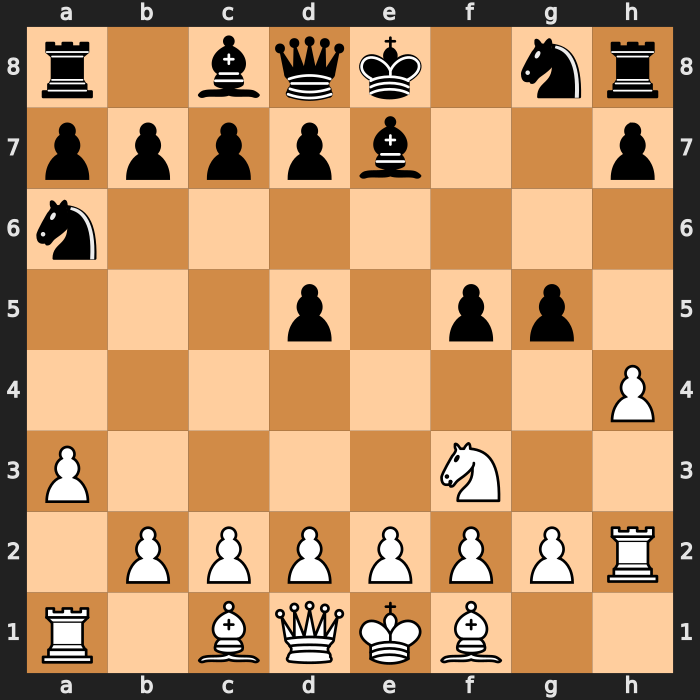

In [ ]:
#alphabeta_game(board, 3, True)

cProfile.run('alphabeta_game(board, 3, True)')

In [ ]:
def test_position(board, fen, depth):
    board.set_fen(fen)
    white_to_move = True if board.turn == chess.WHITE else False
    print(alphabeta_search(board, depth, white_to_move, -math.inf, math.inf))
    return

test_position(board, "8/qQ5p/3pN2K/3pp1R1/4k3/7N/1b1PP3/8 w - - 0 1", 5)

(Move.from_uci('b7a7'), inf)


In [ ]:
board.set_fen("rnbqkbnr/pppp1ppp/8/8/8/8/PPPPQPPP/RNBQKBNR w KQkq - 0 1")
board
board.is_pseudo_legal(board.parse_san("Qxe8"))

True